# 単回帰モデルの実装

## 必要なライブラリのインポート

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from numpy.random import *

## ①データを取得する

In [2]:
with open("exam_results.tsv", "r") as f:
    data = f.read()
    
print(data)

"study hour"	"score"
40	91
15	38
23	62
10	30
12	45
26	49
18	50
31	63
25	87


In [3]:
x = []
y = []

for i, line in enumerate(data.split("\n")):
    if i == 0:
        continue
    tmp_x, tmp_y = line.split("\t")
    x.append(int(tmp_x))
    y.append(int(tmp_y))

In [4]:
print("x:", x)
print("y:", y)

x: [40, 15, 23, 10, 12, 26, 18, 31, 25]
y: [91, 38, 62, 30, 45, 49, 50, 63, 87]


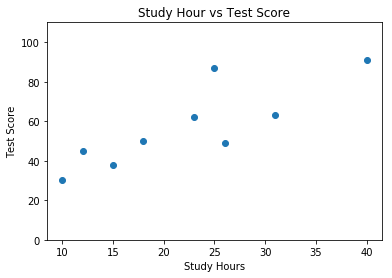

In [5]:
fig, ax = plt.subplots(1, 1)
#plt.plot(x, y, marker="s", color="blue", linestyle=":")
plt.plot(x, y, "o")
plt.title("Study Hour vs Test Score")
ax.set_xlabel("Study Hours")
ax.set_ylabel("Test Score")
plt.ylim(0, 110)
plt.show()

## ②モデルの選択をする

In [6]:
class LinearModel:
    
    def __init__(self):
        self.a = normal(0.0, 0.1)
        self.b = normal(0.0, 0.1)
        
    def __call__(self, x):
        y = self.a * x + self.b
        return y

## ③傾き a と 切片 b のパラメータの初期値をランダムに決める

In [7]:
# クラスLinearModelをインスタンス化するときにパラメータ a と b の初期化を行う
linear_model = LinearModel()

In [8]:
# パラメータ"a"と"b"の値の確認
print("aの値:", linear_model.a, "bの値:", linear_model.b)

aの値: -0.14209015135733102 bの値: 0.10452435983418473


## ④目的関数の設定

In [9]:
def mean_squared_error(true_value, predicted_value):
    E = 1/2 * np.square(true_value - predicted_value)
    return E

## ⑤勾配降下法で学習

In [10]:
# データに対して標準化を行う
def standardize(list_values):
    np_array = np.array(list_values)
    mean = np_array.mean()
    std = np_array.std()
    results = []
    for num in list_values:
        z = (num - mean) / std
        results.append(z)
    return results, mean, std

standardized_x, x_mean, x_std = standardize(x)
standardized_y, y_mean, y_std = standardize(y)
print("標準化後のx:")
print(standardized_x)
print("標準化後のy:")
print(standardized_y)

標準化後のx:
[1.9611613513818404, -0.7967217989988725, 0.0858008091229556, -1.348298429075015, -1.127667777044558, 0.41674678716864116, -0.465775820953187, 0.9683234172447838, 0.30643146115341263]
標準化後のy:
[1.7218338830893947, -0.9798594137317935, 0.2435488716211973, -1.3876621755161238, -0.6230319971705046, -0.4191306162783394, -0.36815527105529816, 0.2945242168442386, 1.5179325021972294]


In [11]:
E_log = []

num_epoch = 10000
learning_rate = 0.0001

for epoch in range(num_epoch):
    for (x_i, y_i) in zip(standardized_x, standardized_y):
        pred_i = linear_model(x_i)
        E = mean_squared_error(y_i, pred_i)
        E_log.append(E)
        parts_of_gradient = (pred_i - y_i)
        linear_model.a = linear_model.a - learning_rate * (parts_of_gradient * x_i)
        linear_model.b = linear_model.b - learning_rate * (parts_of_gradient * 1)
        
    if epoch == 0 or ((epoch+1) % 1000) == 0:
        print("epoch: {}, loss: {:,.3f}".format(epoch+1, E))
        

epoch: 1, loss: 1.061
epoch: 1000, loss: 0.900
epoch: 2000, loss: 0.838
epoch: 3000, loss: 0.814
epoch: 4000, loss: 0.804
epoch: 5000, loss: 0.800
epoch: 6000, loss: 0.798
epoch: 7000, loss: 0.798
epoch: 8000, loss: 0.797
epoch: 9000, loss: 0.797
epoch: 10000, loss: 0.797


## 学習されたモデルの確認

In [12]:
predicted_values = []

for i in standardized_x:
    output = linear_model(i)
    predicted_values.append(output)
print("モデルが予測した値：")
predicted_values

モデルが予測した値：


[1.6338912208414726,
 -0.663675435225579,
 0.07154589471587743,
 -1.1231887664389892,
 -0.9393834339536251,
 0.34725389344392366,
 -0.38796743649753285,
 0.806767224657334,
 0.2553512272012416]

In [13]:
def destandardize(standardized_v, mean, std):
    output = mean + standardized_v * std
    return output
    
outputs = []
for standardized_v in predicted_values:
    out = destandardize(standardized_v, y_mean, y_std)
    outputs.append(out)
    
print("標準化された予測値を元に状態に戻した値：")
outputs

標準化された予測値を元に状態に戻した値：


[89.27480006534275,
 44.202684398168564,
 58.6257614116643,
 35.188261264733725,
 38.79403051810766,
 64.0344152917252,
 49.61133827822946,
 73.04883842516004,
 62.231530665038235]

In [14]:
def model_predict(inputs):
    std_x_for_model = (inputs - x_mean) / x_std
    np_arr_std_x_for_model = np.array(std_x_for_model)
    standardized_pred_values = linear_model(np_arr_std_x_for_model)
    pred_values = []
    for standardized_v in standardized_pred_values:
        out = destandardize(standardized_v, y_mean, y_std)
        pred_values.append(out)
    return pred_values

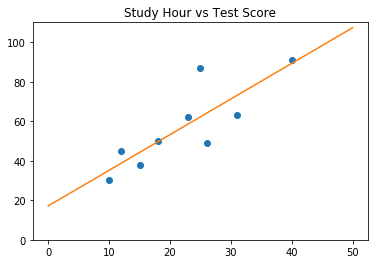

In [15]:
x_for_model = np.linspace(0, 50, 1000)
pred_values = model_predict(x_for_model)
plt.plot(x, y, 'o')
plt.plot(x_for_model, pred_values)
plt.title("Study Hour vs Test Score")
ax.set_xlabel("Study Hours")
ax.set_ylabel("Test Score")
plt.ylim(0, 110)
plt.show()

In [16]:
def main():
    x = input("あなたが勉強する予定の時間を入力してください。: ")
    try:
        std_x = (float(x) - x_mean) / x_std
        output = linear_model(std_x)
        predicted_score = destandardize(output, y_mean, y_std)
        # from np.float64 to float
        predicted_score = float(predicted_score)
        if predicted_score < 0:
            raise ValueError("正しい値を入力してください。")
        elif predicted_score >= 100:
            predicted_score = 100
        elif predicted_score < 0:
            predicted_score = 0
        print("あなたはこのクラスのテストで {}点 "
              "とることができるでしょう。".format(round(predicted_score)))
    except ValueError:
        print("数値を入力してください。")

In [18]:
main()

あなたが勉強する予定の時間を入力してください。: 0
あなたはこのクラスのテストで 17点 とることができるでしょう。
